In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2_spei1 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2_spei1

## Data Preprocessing

In [ ]:
# turn time series dataset into supervised learning dataset
def create_lag_features(df, target_column, lags):
    df = df.copy()
    for lag in range(1, lags + 1):
        df[f"lag_{lag}"] = df[target_column].shift(lag)
    return df

### SPEI-1

In [ ]:
spei1_df = pd.read_csv("/content/SPEI_1_MonthTimescale_1950_2013_Fresno_County.csv")
spei1_df = spei1_df.drop(columns=['lon', 'lat'], axis=1)
print(len(spei1_df))
spei1_df.head()

768


,time,spei
0,1950-01-16,0.568691
1,1950-02-15,-0.323044
2,1950-03-16,-0.148050
3,1950-04-16,-0.585959
4,1950-05-16,-0.860067


In [ ]:
# create lag features (using last month)
lags = 1
lagged_spei1_data = create_lag_features(spei1_df, "spei", lags)

# drop missing values (first row will be NaN)
lagged_spei1_data = lagged_spei1_data.dropna()

lagged_spei1_data.head(2)

,time,spei,lag_1
1,1950-02-15,-0.323044,0.568691
2,1950-03-16,-0.148050,-0.323044


In [ ]:
# data splits

# ---- 80/20 train/test ---- #
# train_size = int(len(lagged_spei1_data) * 0.8)

# train_spei1 = lagged_spei1_data[:train_size]
# test_spei1 = lagged_spei1_data[train_size:]

# X_train_spei1, y_train_spei1 = train_spei1.drop(columns=["time", "spei"]), train_spei1["spei"]
# X_test_spei1, y_test_spei1 = test_spei1.drop(columns=["time", "spei"]), test_spei1["spei"]

# print(f"Training splits (80%):  X_train = {X_train_spei1.shape} | y_train = {y_train_spei1.shape}")
# print(f"Test splits (20%):  X_test = {X_test_spei1.shape} | y_test = {y_test_spei1.shape}")

# ---- 80/10/10 train/val/test ---- #
train_size = int(len(lagged_spei1_data) * 0.8)
val_size = int(len(lagged_spei1_data) * 0.1)

train_spei1 = lagged_spei1_data.iloc[:train_size]
val_spei1 = lagged_spei1_data.iloc[train_size : train_size + val_size]
test_spei1 = lagged_spei1_data.iloc[train_size + val_size :]

X_train_spei1, y_train_spei1 = train_spei1.drop(columns=["time", "spei"]), train_spei1["spei"]
X_val_spei1, y_val_spei1 = val_spei1.drop(columns=["time", "spei"]), val_spei1["spei"]
X_test_spei1, y_test_spei1 = test_spei1.drop(columns=["time", "spei"]), test_spei1["spei"]

print(f"Training splits (80%):  X_train = {X_train_spei1.shape} | y_train = {y_train_spei1.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei1.shape} | y_val = {y_val_spei1.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei1.shape} | y_test = {y_test_spei1.shape}")

Training splits (80%):  X_train = (613, 1) | y_train = (613,)
Validation splits (10%):  X_val = (76, 1) | y_val = (76,)
Test splits (10%):  X_test = (78, 1) | y_test = (78,)


In [ ]:
X_train_spei1.iloc[0], y_train_spei1.iloc[0]

(lag_1    0.568691
 Name: 1, dtype: float64,
 np.float64(-0.32304394))

### SPEI-3

In [ ]:
spei3_df = pd.read_csv("/content/SPEI_3_MonthTimescale_1950_2013_Fresno.csv")
spei3_df = spei3_df.drop(columns=['lon', 'lat'], axis=1)
print(len(spei3_df))
spei3_df.head()

768


,time,spei
0,1950-01-16,-0.113825
1,1950-02-15,-0.082312
2,1950-03-16,-0.025755
3,1950-04-16,-0.624708
4,1950-05-16,-0.823265


In [ ]:
# create lag features (using last 3 months)
lags = 3
lagged_spei3_data = create_lag_features(spei3_df, "spei", lags)

# drop missing values (first 3 rows will be NaN)
lagged_spei3_data = lagged_spei3_data.dropna()

lagged_spei3_data.head(2)

,time,spei,lag_1,lag_2,lag_3
3,1950-04-16,-0.624708,-0.025755,-0.082312,-0.113825
4,1950-05-16,-0.823265,-0.624708,-0.025755,-0.082312


In [ ]:
# data splits

# ---- 80/20 train/test ---- #
# train_size = int(len(lagged_spei3_data) * 0.8)

# train_spei3 = lagged_spei3_data[:train_size]
# test_spei3 = lagged_spei3_data[train_size:]

# X_train_spei3, y_train_spei3 = train_spei3.drop(columns=["time", "spei"]), train_spei3["spei"]
# X_test_spei3, y_test_spei3 = test_spei3.drop(columns=["time", "spei"]), test_spei3["spei"]

# print(f"Training splits (80%):  X_train = {X_train_spei3.shape} | y_train = {y_train_spei3.shape}")
# print(f"Test splits (20%):  X_test = {X_test_spei3.shape} | y_test = {y_test_spei3.shape}")

# ---- 80/10/10 train/val/test ---- #
train_size = int(len(lagged_spei3_data) * 0.8)
val_size = int(len(lagged_spei3_data) * 0.1)

train_spei3 = lagged_spei3_data.iloc[:train_size]
val_spei3 = lagged_spei3_data.iloc[train_size : train_size + val_size]
test_spei3 = lagged_spei3_data.iloc[train_size + val_size :]

X_train_spei3, y_train_spei3 = train_spei3.drop(columns=["time", "spei"]), train_spei3["spei"]
X_val_spei3, y_val_spei3 = val_spei3.drop(columns=["time", "spei"]), val_spei3["spei"]
X_test_spei3, y_test_spei3 = test_spei3.drop(columns=["time", "spei"]), test_spei3["spei"]

print(f"Training splits (80%):  X_train = {X_train_spei3.shape} | y_train = {y_train_spei3.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei3.shape} | y_val = {y_val_spei3.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei3.shape} | y_test = {y_test_spei3.shape}")

Training splits (80%):  X_train = (612, 3) | y_train = (612,)
Validation splits (10%):  X_val = (76, 3) | y_val = (76,)
Test splits (10%):  X_test = (77, 3) | y_test = (77,)


In [ ]:
X_train_spei3.iloc[0], y_train_spei3.iloc[0]

(lag_1   -0.025755
 lag_2   -0.082312
 lag_3   -0.113825
 Name: 3, dtype: float64,
 np.float64(-0.6247076))

### SPEI-6

In [ ]:
spei6_df = pd.read_csv("/content/SPEI_6_MonthTimescale_1950_2013_Fresno.csv")
spei6_df = spei6_df.drop(columns=['lon', 'lat'], axis=1)
print(len(spei6_df))
spei6_df.head()

768


,time,spei
0,1950-01-16,-0.177393
1,1950-02-15,-0.520186
2,1950-03-16,-0.425508
3,1950-04-16,-0.482449
4,1950-05-16,-0.595851


In [ ]:
# create lag features (using last 6 months)
lags = 5
lagged_spei6_data = create_lag_features(spei6_df, "spei", lags)

# drop missing values (first 6 rows will be NaN)
lagged_spei6_data = lagged_spei6_data.dropna()

lagged_spei6_data.head(2)

,time,spei,lag_1,lag_2,lag_3,lag_4,lag_5
5,1950-06-16,-0.379501,-0.595851,-0.482449,-0.425508,-0.520186,-0.177393
6,1950-07-16,-0.753395,-0.379501,-0.595851,-0.482449,-0.425508,-0.520186


In [ ]:
# data splits

# ---- 80/20 train/test ---- #
# train_size = int(len(lagged_spei6_data) * 0.8)

# train_spei6 = lagged_spei6_data[:train_size]
# test_spei6 = lagged_spei6_data[train_size:]

# X_train_spei6, y_train_spei6 = train_spei6.drop(columns=["time", "spei"]), train_spei6["spei"]
# X_test_spei6, y_test_spei6 = test_spei6.drop(columns=["time", "spei"]), test_spei6["spei"]

# print(f"Training splits (80%):  X_train = {X_train_spei6.shape} | y_train = {y_train_spei6.shape}")
# print(f"Test splits (20%):  X_test = {X_test_spei6.shape} | y_test = {y_test_spei6.shape}")

# ---- 80/10/10 train/val/test ---- #
train_size = int(len(lagged_spei6_data) * 0.8)
val_size = int(len(lagged_spei6_data) * 0.1)

train_spei6 = lagged_spei6_data.iloc[:train_size]
val_spei6 = lagged_spei6_data.iloc[train_size : train_size + val_size]
test_spei6 = lagged_spei6_data.iloc[train_size + val_size :]

X_train_spei6, y_train_spei6 = train_spei6.drop(columns=["time", "spei"]), train_spei6["spei"]
X_val_spei6, y_val_spei6 = val_spei6.drop(columns=["time", "spei"]), val_spei6["spei"]
X_test_spei6, y_test_spei6 = test_spei6.drop(columns=["time", "spei"]), test_spei6["spei"]

print(f"Training splits (80%):  X_train = {X_train_spei6.shape} | y_train = {y_train_spei6.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei6.shape} | y_val = {y_val_spei6.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei6.shape} | y_test = {y_test_spei6.shape}")

Training splits (80%):  X_train = (610, 5) | y_train = (610,)
Validation splits (10%):  X_val = (76, 5) | y_val = (76,)
Test splits (10%):  X_test = (77, 5) | y_test = (77,)


In [ ]:
X_train_spei6.iloc[0], y_train_spei6.iloc[0]

(lag_1   -0.595851
 lag_2   -0.482449
 lag_3   -0.425508
 lag_4   -0.520186
 lag_5   -0.177393
 Name: 5, dtype: float64,
 np.float64(-0.3795011))

### SPEI-12

In [ ]:
spei12_df = pd.read_csv("/content/SPEI_12_MonthTimescale_1950_2013_Fresno.csv")
spei12_df = spei12_df.drop(columns=['lon', 'lat'], axis=1)
print(len(spei12_df))
spei12_df.head()

768


,time,spei
0,1950-01-16,-0.291648
1,1950-02-15,-0.343679
2,1950-03-16,-0.756500
3,1950-04-16,-0.402883
4,1950-05-16,-0.857081


In [ ]:
# create lag features (using last 6 months)
lags = 11
lagged_spei12_data = create_lag_features(spei12_df, "spei", lags)

# drop missing values (first 12 rows will be NaN)
lagged_spei12_data = lagged_spei12_data.dropna()

lagged_spei12_data.head(2)

,time,spei,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
11,1950-12-16,-0.129998,-0.221964,-0.538660,-0.735851,-0.920532,-0.628790,-0.588362,-0.857081,-0.402883,-0.756500,-0.343679,-0.291648
12,1951-01-16,-0.444740,-0.129998,-0.221964,-0.538660,-0.735851,-0.920532,-0.628790,-0.588362,-0.857081,-0.402883,-0.756500,-0.343679


In [ ]:
# data splits

# ---- 80/20 train/test ---- #
# train_size = int(len(lagged_spei6_data) * 0.8)

# train_spei6 = lagged_spei6_data[:train_size]
# test_spei6 = lagged_spei6_data[train_size:]

# X_train_spei6, y_train_spei6 = train_spei6.drop(columns=["time", "spei"]), train_spei6["spei"]
# X_test_spei6, y_test_spei6 = test_spei6.drop(columns=["time", "spei"]), test_spei6["spei"]

# print(f"Training splits (80%):  X_train = {X_train_spei6.shape} | y_train = {y_train_spei6.shape}")
# print(f"Test splits (20%):  X_test = {X_test_spei6.shape} | y_test = {y_test_spei6.shape}")

# ---- 80/10/10 train/val/test ---- #
train_size = int(len(lagged_spei12_data) * 0.8)
val_size = int(len(lagged_spei12_data) * 0.1)

train_spei12 = lagged_spei12_data.iloc[:train_size]
val_spei12 = lagged_spei12_data.iloc[train_size : train_size + val_size]
test_spei12 = lagged_spei12_data.iloc[train_size + val_size :]

X_train_spei12, y_train_spei12 = train_spei12.drop(columns=["time", "spei"]), train_spei12["spei"]
X_val_spei12, y_val_spei12 = val_spei12.drop(columns=["time", "spei"]), val_spei12["spei"]
X_test_spei12, y_test_spei12 = test_spei12.drop(columns=["time", "spei"]), test_spei12["spei"]

print(f"Training splits (80%):  X_train = {X_train_spei12.shape} | y_train = {y_train_spei12.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei12.shape} | y_val = {y_val_spei12.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei12.shape} | y_test = {y_test_spei12.shape}")

Training splits (80%):  X_train = (605, 11) | y_train = (605,)
Validation splits (10%):  X_val = (75, 11) | y_val = (75,)
Test splits (10%):  X_test = (77, 11) | y_test = (77,)


In [ ]:
X_train_spei12.iloc[0], y_train_spei12.iloc[0]

(lag_1    -0.221964
 lag_2    -0.538660
 lag_3    -0.735851
 lag_4    -0.920532
 lag_5    -0.628790
 lag_6    -0.588362
 lag_7    -0.857081
 lag_8    -0.402883
 lag_9    -0.756500
 lag_10   -0.343679
 lag_11   -0.291648
 Name: 11, dtype: float64,
 np.float64(-0.1299985))

## XGBoost | SPEI-1

### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5]
}
tscv = TimeSeriesSplit(n_splits=3)


fine_tuned_xgb_model_spei1 = xgb.XGBRegressor(random_state=42)
grid_search_spei1 = GridSearchCV(estimator=fine_tuned_xgb_model_spei1,
                           param_grid=param_grid,
                          #  cv=tscv, # cross validation folds
                           verbose=2,
                           scoring='neg_mean_absolute_error')
grid_search_spei1.fit(X_train_spei1, y_train_spei1)

print("Best Parameters:", grid_search_spei1.best_params_)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n

KeyboardInterrupt: 

In [ ]:
best_xgb_spei1 = grid_search_spei1.best_estimator_

# make predictions
y_pred_spei1_after_tuning = best_xgb_spei1.predict(X_test_spei1)

### Model Training

In [ ]:
# model
# xgb_model_spei1 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,
#                              max_depth=5,
#                              learning_rate=0.1,
#                              random_state=42)

# finetuned params 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
xgb_model_spei1 = xgb.XGBRegressor(objective="reg:squarederror",
                                  n_estimators=300,
                                  max_depth=3,
                                  learning_rate=0.01,
                                  random_state=42)

# train
xgb_model_spei1.fit(X_train_spei1, y_train_spei1)

# make predictions
y_pred_spei1 = xgb_model_spei1.predict(X_test_spei1)

### Evaluation

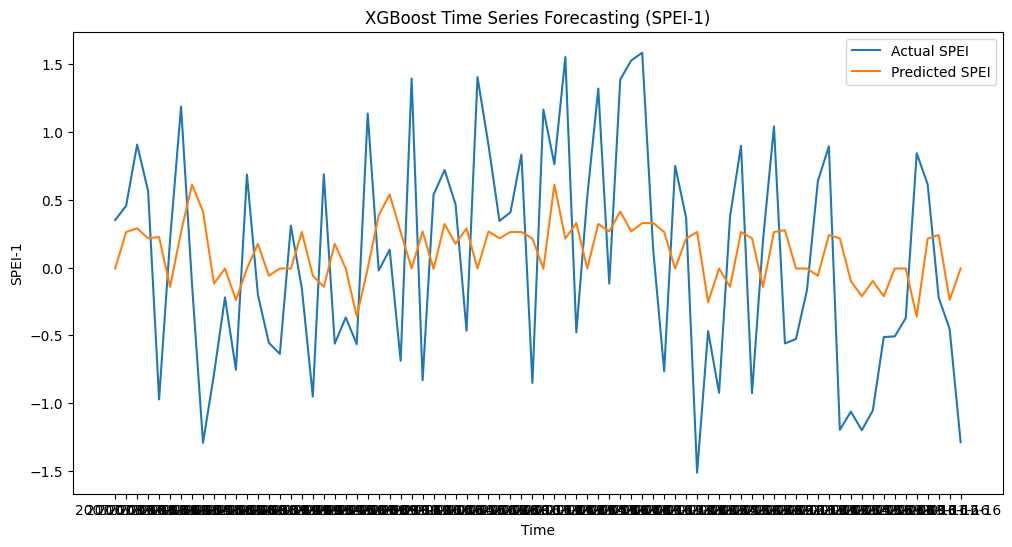

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei1["time"], y_test_spei1, label="Actual SPEI")
plt.plot(test_spei1["time"], y_pred_spei1, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-1)")
plt.show()

In [ ]:
mae, mse, rmse, r2_spei1 = calculate_metrics(y_test_spei1, y_pred_spei1)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei1}")

Mean Absolute Error: 0.6965372599900618
Mean Squared Error: 0.6431815168713194
Root Mean Squared Error: 0.8019859829643654
R^2 Score: 0.02765174839111173


## XGBoost | SPEI-3

### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5]
}
tscv = TimeSeriesSplit(n_splits=3)


fine_tuned_xgb_model_spei3 = xgb.XGBRegressor(random_state=42)
grid_search_spei3 = GridSearchCV(estimator=fine_tuned_xgb_model_spei3,
                           param_grid=param_grid,
                           cv=tscv, # cross validation folds
                           verbose=2,
                           scoring='neg_mean_absolute_error')
grid_search_spei3.fit(X_train_spei3, y_train_spei3)

print("Best Parameters:", grid_search_spei3.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [ ]:
best_xgb_spei3 = grid_search_spei3.best_estimator_

# make predictions
y_pred_spei3_after_tuning = best_xgb_spei3.predict(X_test_spei3)

### Model Training

In [ ]:
# model
# xgb_model_spei3 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,
#                              max_depth=5,
#                              learning_rate=0.1,
#                              random_state=42)

# finetuned params 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}

xgb_model_spei3 = xgb.XGBRegressor(objective="reg:squarederror",
                             n_estimators=400,
                             max_depth=3,
                             learning_rate=0.01,
                             random_state=42)


# train
xgb_model_spei3.fit(X_train_spei3, y_train_spei3)

# make predictions
y_pred_spei3 = xgb_model_spei3.predict(X_test_spei3)

### Evaluation

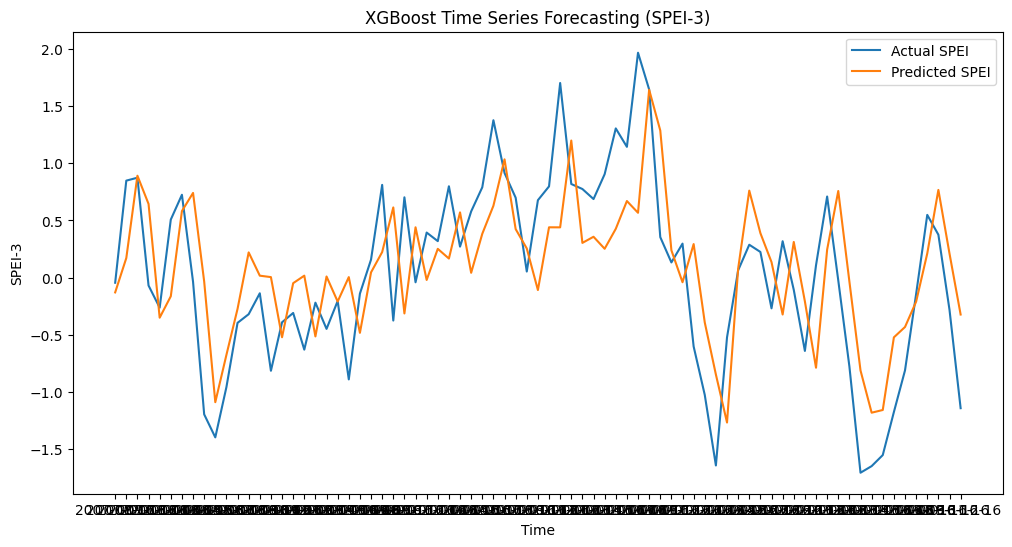

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei3["time"], y_test_spei3, label="Actual SPEI")
plt.plot(test_spei3["time"], y_pred_spei3, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-3")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-3)")
plt.show()

In [ ]:
mae_spei3, mse_spei3, rmse_spei3, r2_spei3 = calculate_metrics(y_test_spei3, y_pred_spei3)
print(f"Mean Absolute Error: {mae_spei3}")
print(f"Mean Squared Error: {mse_spei3}")
print(f"Root Mean Squared Error: {rmse_spei3}")
print(f"R^2 Score: {r2_spei3}")

Mean Absolute Error: 0.49720791873876896
Mean Squared Error: 0.3459882962241569
Root Mean Squared Error: 0.5882076982020525
R^2 Score: 0.47022774000594725


## XGBoost | SPEI-6

### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5]
}
tscv = TimeSeriesSplit(n_splits=3)


fine_tuned_xgb_model_spei6 = xgb.XGBRegressor(random_state=42)
grid_search_spei6 = GridSearchCV(estimator=fine_tuned_xgb_model_spei6,
                           param_grid=param_grid,
                           cv=tscv, # cross validation folds
                           verbose=1,
                           scoring='neg_mean_absolute_error')
grid_search_spei6.fit(X_train_spei6, y_train_spei6)

print("Best Parameters:", grid_search_spei6.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}


In [ ]:
best_xgb_spei6 = grid_search_spei6.best_estimator_

# make predictions
y_pred_spei6_after_tuning = best_xgb_spei6.predict(X_test_spei6)

### Model Training

In [ ]:
# model
# xgb_model_spei6 = xgb.XGBRegressor(objective="reg:squarederror",
#                                   n_estimators=500,
#                                   max_depth=5,
#                                   learning_rate=0.1,
#                                   random_state=42)

# finetuned params {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
xgb_model_spei6 = xgb.XGBRegressor(objective="reg:squarederror",
                                  n_estimators=400,
                                  max_depth=3,
                                  learning_rate=0.01,
                                  random_state=42)


# train
xgb_model_spei6.fit(X_train_spei6, y_train_spei6)

# make predictions
y_pred_spei6 = xgb_model_spei6.predict(X_test_spei6)

### Evaluation

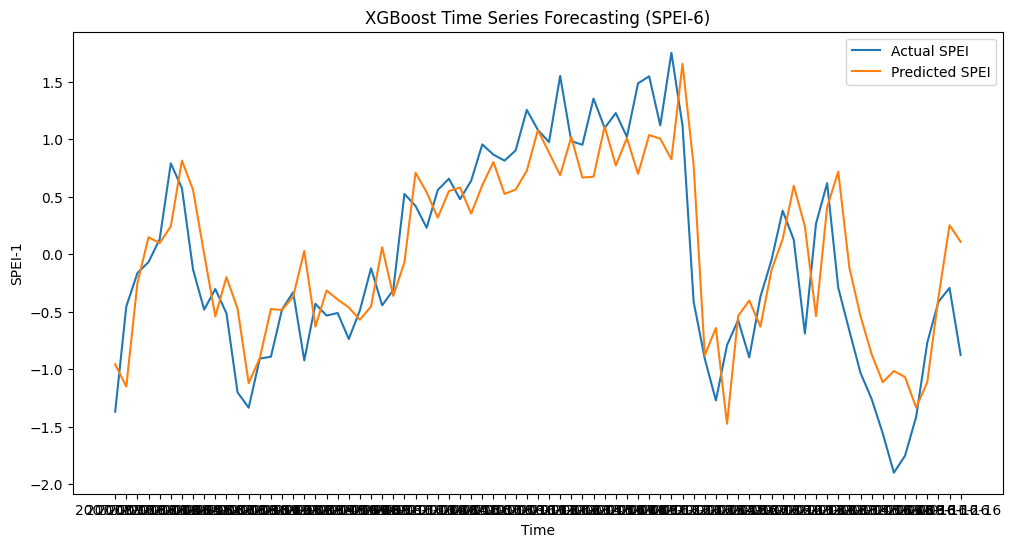

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei6["time"], y_test_spei6, label="Actual SPEI")
plt.plot(test_spei6["time"], y_pred_spei6, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-6)")
plt.show()

In [ ]:
mae, mse, rmse, r2_spei1 = calculate_metrics(y_test_spei6, y_pred_spei6)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei1}")

Mean Absolute Error: 0.38717810264819214
Mean Squared Error: 0.2294893344816699
Root Mean Squared Error: 0.47905045087304726
R^2 Score: 0.7137293569149756


In [ ]:
mae, mse, rmse, r2_spei1 = calculate_metrics(y_test_spei6, y_pred_spei6)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei1}")

Mean Absolute Error: 0.3822934760493186
Mean Squared Error: 0.23371750438835778
Root Mean Squared Error: 0.48344338281577276
R^2 Score: 0.7084550337269541


### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5],
}


fine_tuned_xgb_model = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=fine_tuned_xgb_model,
                           param_grid=param_grid,
                           cv=3, # cross validation folds
                           verbose=2,
                           scoring='neg_mean_absolute_error')
grid_search.fit(X_train_spei6, y_train_spei6)

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 252 candidates, totalling 756 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [ ]:
best_xgb_spei6 = grid_search.best_estimator_

# make predictions
y_pred_spei6_after_tuning = best_xgb_spei6.predict(X_test_spei6)

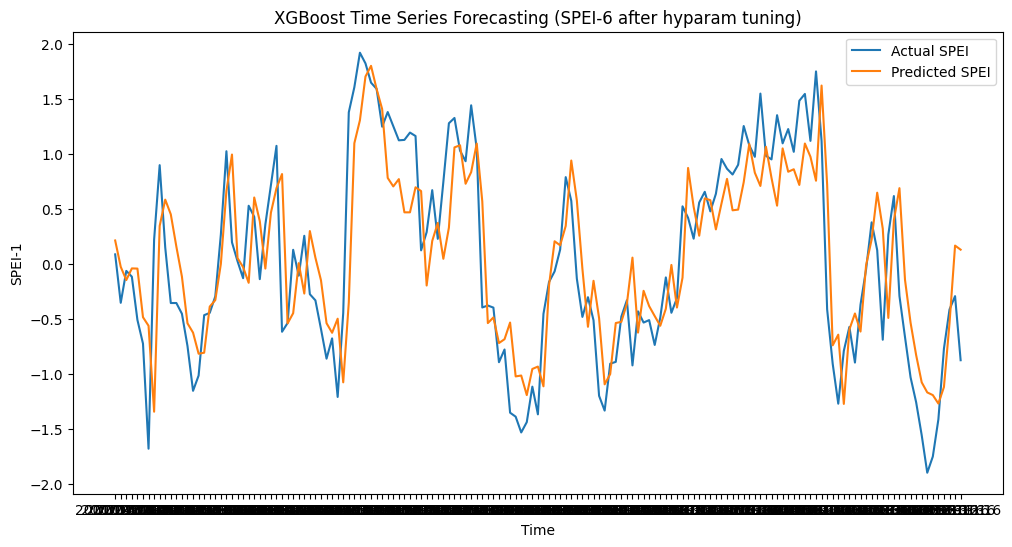

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei6["time"], y_test_spei6, label="Actual SPEI")
plt.plot(test_spei6["time"], y_pred_spei6_after_tuning, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-6 after hyparam tuning)")
plt.show()

In [ ]:
mae, mse, rmse, r2_spei1 = calculate_metrics(y_test_spei6, y_pred_spei6_after_tuning)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei1}")

Mean Absolute Error: 0.4072888476323233
Mean Squared Error: 0.2658501213465759
Root Mean Squared Error: 0.5156065567335
R^2 Score: 0.6768006652625538


## XGBoost | SPEI-12

### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5]
}
tscv = TimeSeriesSplit(n_splits=3)


fine_tuned_xgb_model_spei12 = xgb.XGBRegressor(random_state=42)
grid_search_spei12 = GridSearchCV(estimator=fine_tuned_xgb_model_spei12,
                           param_grid=param_grid,
                           cv=tscv, # cross validation folds
                           verbose=1,
                           scoring='neg_mean_absolute_error')
grid_search_spei12.fit(X_train_spei12, y_train_spei12)

print("Best Parameters:", grid_search_spei12.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}


In [ ]:
best_xgb_spei12 = grid_search_spei12.best_estimator_

# make predictions
y_pred_spei12_after_tuning = best_xgb_spei12.predict(X_test_spei12)

### Model Training

In [ ]:
# model
# xgb_model_spei12 = xgb.XGBRegressor(objective="reg:squarederror",
#                                   n_estimators=500,
#                                   max_depth=5,
#                                   learning_rate=0.1,
#                                   random_state=42)

# finetuned params {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
xgb_model_spei12 = xgb.XGBRegressor(objective="reg:squarederror",
                                  n_estimators=400,
                                  max_depth=3,
                                  learning_rate=0.01,
                                  random_state=42)


# train
xgb_model_spei12.fit(X_train_spei12, y_train_spei12)

# make predictions
y_pred_spei12 = xgb_model_spei12.predict(X_test_spei12)

### Evaluation

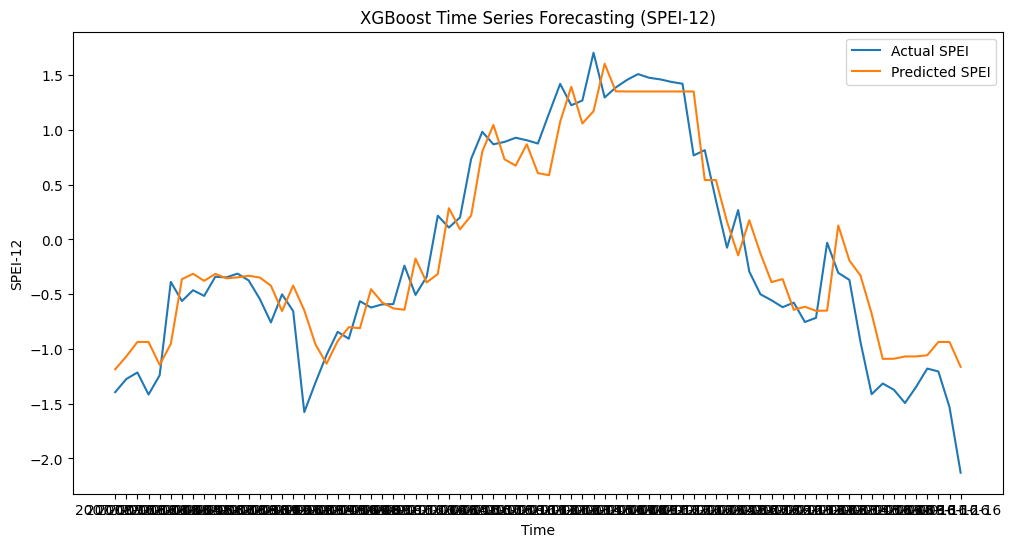

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei6["time"], y_test_spei12, label="Actual SPEI")
plt.plot(test_spei6["time"], y_pred_spei12, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-12")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-12)")
plt.show()

In [ ]:
mae, mse, rmse, r2_spei = calculate_metrics(y_test_spei12, y_pred_spei12)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei}")

Mean Absolute Error: 0.26437720330910813
Mean Squared Error: 0.11221303404577423
Root Mean Squared Error: 0.33498213989073244
R^2 Score: 0.8829522428091274


# Using more data (1950-2023)

## Data Preprocessing

In [ ]:
# turn time series dataset into supervised learning dataset
def create_lag_features(df, target_column, lags):
    df = df.copy()
    for lag in range(1, lags + 1):
        df[f"lag_{lag}"] = df[target_column].shift(lag)
    return df

### SPEI-1

In [ ]:
spei1_df = pd.read_csv("/content/SPEI_1_MonthTimescale_1950_2023_Fresno.csv")
spei1_df = spei1_df.drop(columns=['lon', 'lat'], axis=1)
print(len(spei1_df))
spei1_df.head()

888


,time,spei
0,1950-01-16,0.568691
1,1950-02-15,-0.323044
2,1950-03-16,-0.148050
3,1950-04-16,-0.585959
4,1950-05-16,-0.860067


In [ ]:
# create lag features (using last 1 month)
lags = 1
lagged_spei1_data = create_lag_features(spei1_df, "spei", lags)

# drop missing values (first 1 row will be NaN)
lagged_spei1_data = lagged_spei1_data.dropna()

lagged_spei1_data.head(2)

,time,spei,lag_1
1,1950-02-15,-0.323044,0.568691
2,1950-03-16,-0.148050,-0.323044


In [ ]:
# data splits

# ---- 80/20 train/test ---- #
# train_size = int(len(lagged_spei1_data) * 0.8)

# train_spei1 = lagged_spei1_data[:train_size]
# test_spei1 = lagged_spei1_data[train_size:]

# X_train_spei1, y_train_spei1 = train_spei1.drop(columns=["time", "spei"]), train_spei1["spei"]
# X_test_spei1, y_test_spei1 = test_spei1.drop(columns=["time", "spei"]), test_spei1["spei"]

# print(f"Training splits (80%):  X_train = {X_train_spei1.shape} | y_train = {y_train_spei1.shape}")
# print(f"Test splits (20%):  X_test = {X_test_spei1.shape} | y_test = {y_test_spei1.shape}")

# ---- 80/10/10 train/val/test ---- #
train_size = int(len(lagged_spei1_data) * 0.8)
val_size = int(len(lagged_spei1_data) * 0.1)

train_spei1 = lagged_spei1_data.iloc[:train_size]
val_spei1 = lagged_spei1_data.iloc[train_size : train_size + val_size]
test_spei1 = lagged_spei1_data.iloc[train_size + val_size :]

X_train_spei1, y_train_spei1 = train_spei1.drop(columns=["time", "spei"]), train_spei1["spei"]
X_val_spei1, y_val_spei1 = val_spei1.drop(columns=["time", "spei"]), val_spei1["spei"]
X_test_spei1, y_test_spei1 = test_spei1.drop(columns=["time", "spei"]), test_spei1["spei"]

print(f"Training splits (80%):  X_train = {X_train_spei1.shape} | y_train = {y_train_spei1.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei1.shape} | y_val = {y_val_spei1.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei1.shape} | y_test = {y_test_spei1.shape}")

Training splits (80%):  X_train = (709, 1) | y_train = (709,)
Validation splits (10%):  X_val = (88, 1) | y_val = (88,)
Test splits (10%):  X_test = (90, 1) | y_test = (90,)


In [ ]:
X_train_spei1.iloc[0], y_train_spei1.iloc[0]

(lag_1    0.568691
 Name: 1, dtype: float64,
 np.float64(-0.32304394))

### SPEI-3

In [ ]:
spei3_df = pd.read_csv("/content/SPEI_3_MonthTimescale_1950_2023_Fresno.csv")
spei3_df = spei3_df.drop(columns=['lon', 'lat'], axis=1)
print(len(spei3_df))
spei3_df.head()

888


,time,spei
0,1950-01-16,-0.113825
1,1950-02-15,-0.082312
2,1950-03-16,-0.025755
3,1950-04-16,-0.624708
4,1950-05-16,-0.823265


In [ ]:
# create lag features (using last 3 months)
lags = 3
lagged_spei3_data = create_lag_features(spei3_df, "spei", lags)

# drop missing values (first 3 rows will be NaN)
lagged_spei3_data = lagged_spei3_data.dropna()

lagged_spei3_data.head(2)

,time,spei,lag_1,lag_2,lag_3
3,1950-04-16,-0.624708,-0.025755,-0.082312,-0.113825
4,1950-05-16,-0.823265,-0.624708,-0.025755,-0.082312


In [ ]:
# data splits

# ---- 80/20 train/test ---- #
# train_size = int(len(lagged_spei3_data) * 0.8)

# train_spei3 = lagged_spei3_data[:train_size]
# test_spei3 = lagged_spei3_data[train_size:]

# X_train_spei3, y_train_spei3 = train_spei3.drop(columns=["time", "spei"]), train_spei3["spei"]
# X_test_spei3, y_test_spei3 = test_spei3.drop(columns=["time", "spei"]), test_spei3["spei"]

# print(f"Training splits (80%):  X_train = {X_train_spei3.shape} | y_train = {y_train_spei3.shape}")
# print(f"Test splits (20%):  X_test = {X_test_spei3.shape} | y_test = {y_test_spei3.shape}")

# ---- 80/10/10 train/val/test ---- #
train_size = int(len(lagged_spei3_data) * 0.8)
val_size = int(len(lagged_spei3_data) * 0.1)

train_spei3 = lagged_spei3_data.iloc[:train_size]
val_spei3 = lagged_spei3_data.iloc[train_size : train_size + val_size]
test_spei3 = lagged_spei3_data.iloc[train_size + val_size :]

X_train_spei3, y_train_spei3 = train_spei3.drop(columns=["time", "spei"]), train_spei3["spei"]
X_val_spei3, y_val_spei3 = val_spei3.drop(columns=["time", "spei"]), val_spei3["spei"]
X_test_spei3, y_test_spei3 = test_spei3.drop(columns=["time", "spei"]), test_spei3["spei"]

print(f"Training splits (80%):  X_train = {X_train_spei3.shape} | y_train = {y_train_spei3.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei3.shape} | y_val = {y_val_spei3.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei3.shape} | y_test = {y_test_spei3.shape}")

Training splits (80%):  X_train = (708, 3) | y_train = (708,)
Validation splits (10%):  X_val = (88, 3) | y_val = (88,)
Test splits (10%):  X_test = (89, 3) | y_test = (89,)


In [ ]:
X_train_spei3.iloc[0], y_train_spei3.iloc[0]

(lag_1   -0.025755
 lag_2   -0.082312
 lag_3   -0.113825
 Name: 3, dtype: float64,
 np.float64(-0.6247076))

### SPEI-6

In [ ]:
spei6_df = pd.read_csv("/content/SPEI_6_MonthTimescale_1950_2023_Fresno.csv")
spei6_df = spei6_df.drop(columns=['lon', 'lat'], axis=1)
print(len(spei6_df))
spei6_df.head()

888


,time,spei
0,1950-01-16,-0.177393
1,1950-02-15,-0.520186
2,1950-03-16,-0.425508
3,1950-04-16,-0.482449
4,1950-05-16,-0.595851


In [ ]:
# create lag features (using last 6 months)
lags = 6
lagged_spei6_data = create_lag_features(spei6_df, "spei", lags)

# drop missing values (first 6 rows will be NaN)
lagged_spei6_data = lagged_spei6_data.dropna()

lagged_spei6_data.head(2)

,time,spei,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
6,1950-07-16,-0.753395,-0.379501,-0.595851,-0.482449,-0.425508,-0.520186,-0.177393
7,1950-08-16,-0.883109,-0.753395,-0.379501,-0.595851,-0.482449,-0.425508,-0.520186


In [ ]:
# data splits

# ---- 80/20 train/test ---- #
# train_size = int(len(lagged_spei6_data) * 0.8)

# train_spei6 = lagged_spei6_data[:train_size]
# test_spei6 = lagged_spei6_data[train_size:]

# X_train_spei6, y_train_spei6 = train_spei6.drop(columns=["time", "spei"]), train_spei6["spei"]
# X_test_spei6, y_test_spei6 = test_spei6.drop(columns=["time", "spei"]), test_spei6["spei"]

# print(f"Training splits (80%):  X_train = {X_train_spei6.shape} | y_train = {y_train_spei6.shape}")
# print(f"Test splits (20%):  X_test = {X_test_spei6.shape} | y_test = {y_test_spei6.shape}")

# ---- 80/10/10 train/val/test ---- #
train_size = int(len(lagged_spei6_data) * 0.8)
val_size = int(len(lagged_spei6_data) * 0.1)

train_spei6 = lagged_spei6_data.iloc[:train_size]
val_spei6 = lagged_spei6_data.iloc[train_size : train_size + val_size]
test_spei6 = lagged_spei6_data.iloc[train_size + val_size :]

X_train_spei6, y_train_spei6 = train_spei6.drop(columns=["time", "spei"]), train_spei6["spei"]
X_val_spei6, y_val_spei6 = val_spei6.drop(columns=["time", "spei"]), val_spei6["spei"]
X_test_spei6, y_test_spei6 = test_spei6.drop(columns=["time", "spei"]), test_spei6["spei"]

print(f"Training splits (80%):  X_train = {X_train_spei6.shape} | y_train = {y_train_spei6.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei6.shape} | y_val = {y_val_spei6.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei6.shape} | y_test = {y_test_spei6.shape}")

Training splits (80%):  X_train = (705, 6) | y_train = (705,)
Validation splits (10%):  X_val = (88, 6) | y_val = (88,)
Test splits (10%):  X_test = (89, 6) | y_test = (89,)


In [ ]:
X_train_spei6.iloc[0], y_train_spei6.iloc[0]

(lag_1   -0.379501
 lag_2   -0.595851
 lag_3   -0.482449
 lag_4   -0.425508
 lag_5   -0.520186
 lag_6   -0.177393
 Name: 6, dtype: float64,
 np.float64(-0.7533954))

### SPEI-12

In [ ]:
spei12_df = pd.read_csv("/content/SPEI_12_MonthTimescale_1950_2023_Fresno.csv")
spei12_df = spei12_df.drop(columns=['lon', 'lat'], axis=1)
print(len(spei12_df))
spei12_df.head()

888


,time,spei
0,1950-01-16,-0.291648
1,1950-02-15,-0.343679
2,1950-03-16,-0.756500
3,1950-04-16,-0.402883
4,1950-05-16,-0.857081


In [ ]:
# create lag features (using last 6 months)
lags = 6
lagged_spei12_data = create_lag_features(spei12_df, "spei", lags)

# drop missing values (first 12 rows will be NaN)
lagged_spei12_data = lagged_spei12_data.dropna()

lagged_spei12_data.head(2)

,time,spei,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
6,1950-07-16,-0.628790,-0.588362,-0.857081,-0.402883,-0.756500,-0.343679,-0.291648
7,1950-08-16,-0.920532,-0.628790,-0.588362,-0.857081,-0.402883,-0.756500,-0.343679


In [ ]:
# data splits

# ---- 80/20 train/test ---- #
# train_size = int(len(lagged_spei6_data) * 0.8)

# train_spei6 = lagged_spei6_data[:train_size]
# test_spei6 = lagged_spei6_data[train_size:]

# X_train_spei6, y_train_spei6 = train_spei6.drop(columns=["time", "spei"]), train_spei6["spei"]
# X_test_spei6, y_test_spei6 = test_spei6.drop(columns=["time", "spei"]), test_spei6["spei"]

# print(f"Training splits (80%):  X_train = {X_train_spei6.shape} | y_train = {y_train_spei6.shape}")
# print(f"Test splits (20%):  X_test = {X_test_spei6.shape} | y_test = {y_test_spei6.shape}")

# ---- 80/10/10 train/val/test ---- #
train_size = int(len(lagged_spei12_data) * 0.8)
val_size = int(len(lagged_spei12_data) * 0.1)

train_spei12 = lagged_spei12_data.iloc[:train_size]
val_spei12 = lagged_spei12_data.iloc[train_size : train_size + val_size]
test_spei12 = lagged_spei12_data.iloc[train_size + val_size :]

X_train_spei12, y_train_spei12 = train_spei12.drop(columns=["time", "spei"]), train_spei12["spei"]
X_val_spei12, y_val_spei12 = val_spei12.drop(columns=["time", "spei"]), val_spei12["spei"]
X_test_spei12, y_test_spei12 = test_spei12.drop(columns=["time", "spei"]), test_spei12["spei"]

print(f"Training splits (80%):  X_train = {X_train_spei12.shape} | y_train = {y_train_spei12.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei12.shape} | y_val = {y_val_spei12.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei12.shape} | y_test = {y_test_spei12.shape}")

Training splits (80%):  X_train = (705, 6) | y_train = (705,)
Validation splits (10%):  X_val = (88, 6) | y_val = (88,)
Test splits (10%):  X_test = (89, 6) | y_test = (89,)


In [ ]:
X_train_spei12.iloc[0], y_train_spei12.iloc[0]

(lag_1   -0.588362
 lag_2   -0.857081
 lag_3   -0.402883
 lag_4   -0.756500
 lag_5   -0.343679
 lag_6   -0.291648
 Name: 6, dtype: float64,
 np.float64(-0.62878996))

## XGBoost | SPEI-1

### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5]
}
tscv = TimeSeriesSplit(n_splits=3)


fine_tuned_xgb_model_spei1 = xgb.XGBRegressor(random_state=42)
grid_search_spei1 = GridSearchCV(estimator=fine_tuned_xgb_model_spei1,
                           param_grid=param_grid,
                           cv=tscv, # cross validation folds
                           verbose=2,
                           scoring='neg_mean_absolute_error')
grid_search_spei1.fit(X_train_spei1, y_train_spei1)

print("Best Parameters:", grid_search_spei1.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [ ]:
best_xgb_spei1 = grid_search_spei1.best_estimator_

# make predictions
y_pred_spei1_after_tuning = best_xgb_spei1.predict(X_test_spei1)

### Model Training

In [ ]:
# model
# xgb_model_spei1 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,
#                              max_depth=5,
#                              learning_rate=0.1,
#                              random_state=42)

# hyparam tuned {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
xgb_model_spei1 = xgb.XGBRegressor(objective="reg:squarederror",
                             n_estimators=300,
                             max_depth=3,
                             learning_rate=0.01,
                             random_state=42)


# train
xgb_model_spei1.fit(X_train_spei1, y_train_spei1)

# make predictions
y_pred_spei1 = xgb_model_spei1.predict(X_test_spei1)

### Evaluation

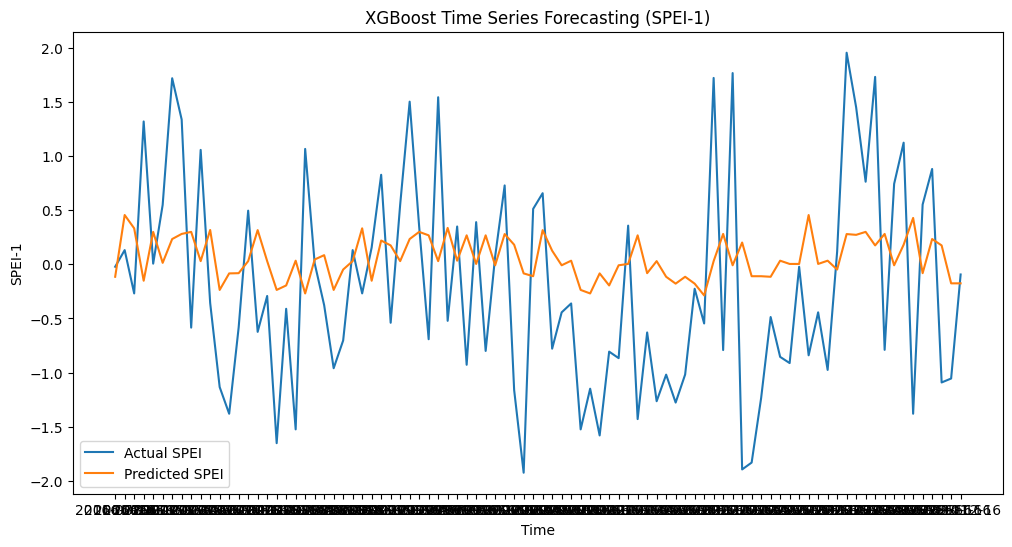

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei1["time"], y_test_spei1, label="Actual SPEI")
plt.plot(test_spei1["time"], y_pred_spei1, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-1)")
plt.show()

In [ ]:
mae, mse, rmse, r2_spei1 = calculate_metrics(y_test_spei1, y_pred_spei1)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei1}")

Mean Absolute Error: 0.8438070601189511
Mean Squared Error: 0.9679468402043356
Root Mean Squared Error: 0.9838428940660879
R^2 Score: -0.031050981515753362


## XGBoost | SPEI-3

### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5]
}
tscv = TimeSeriesSplit(n_splits=3)


fine_tuned_xgb_model_spei3 = xgb.XGBRegressor(random_state=42)
grid_search_spei3 = GridSearchCV(estimator=fine_tuned_xgb_model_spei3,
                           param_grid=param_grid,
                           cv=tscv, # cross validation folds
                           verbose=2,
                           scoring='neg_mean_absolute_error')
grid_search_spei3.fit(X_train_spei3, y_train_spei3)

print("Best Parameters:", grid_search_spei3.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [ ]:
best_xgb_spei3 = grid_search_spei3.best_estimator_

# make predictions
y_pred_spei3_after_tuning = best_xgb_spei3.predict(X_test_spei3)

### Model Training

In [ ]:
# model
# xgb_model_spei3 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,
#                              max_depth=5,
#                              learning_rate=0.1,
#                              random_state=42)

# finetuned model 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
xgb_model_spei3 = xgb.XGBRegressor(objective="reg:squarederror",
                             n_estimators=300,
                             max_depth=3,
                             learning_rate=0.01,
                             random_state=42)

# xgb_model_spei3 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,  # Reduce number of trees
#                              max_depth=5,  # Reduce tree depth
#                              learning_rate=0.05,  # Lower learning rate
#                              subsample=0.8,  # Use 80% of data per tree
#                              colsample_bytree=0.8,  # Use 80% of features per tree
#                              random_state=42)


# train
xgb_model_spei3.fit(X_train_spei3, y_train_spei3)

# make predictions
y_pred_spei3 = xgb_model_spei3.predict(X_test_spei3)

### Evaluation

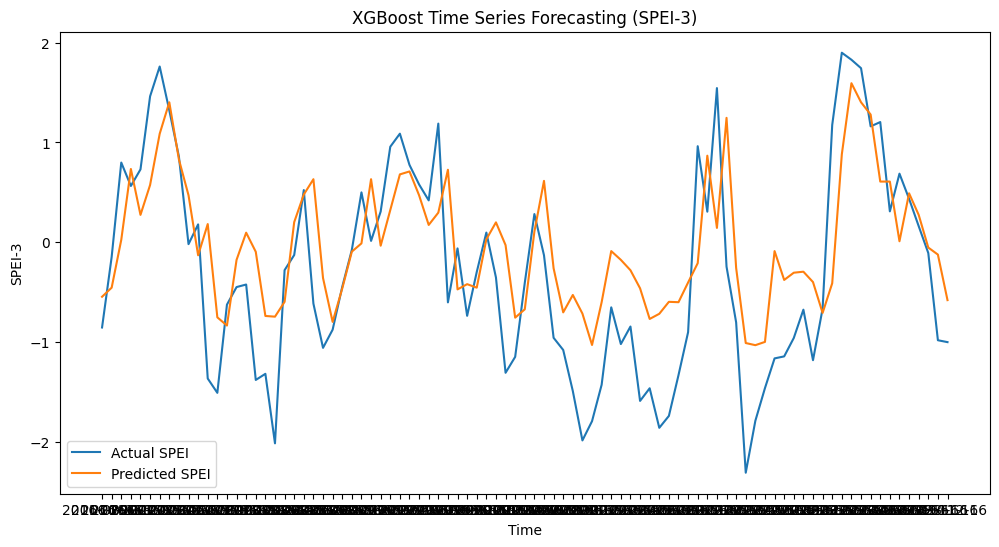

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei3["time"], y_test_spei3, label="Actual SPEI")
plt.plot(test_spei3["time"], y_pred_spei3, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-3")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-3)")
plt.show()

In [ ]:
mae, mse, rmse, r2_spei3 = calculate_metrics(y_test_spei3, y_pred_spei3)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei3}")

Mean Absolute Error: 0.5971896245785665
Mean Squared Error: 0.5269864291251339
Root Mean Squared Error: 0.7259383094486294
R^2 Score: 0.5038070107459791


## XGBoost | SPEI-6

### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5]
}
tscv = TimeSeriesSplit(n_splits=3)


fine_tuned_xgb_model_spei6 = xgb.XGBRegressor(random_state=42)
grid_search_spei6 = GridSearchCV(estimator=fine_tuned_xgb_model_spei6,
                           param_grid=param_grid,
                           cv=tscv, # cross validation folds
                           verbose=1,
                           scoring='neg_mean_absolute_error')
grid_search_spei6.fit(X_train_spei6, y_train_spei6)

print("Best Parameters:", grid_search_spei6.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}


In [ ]:
best_xgb_spei6 = grid_search_spei6.best_estimator_

# make predictions
y_pred_spei6_after_tuning = best_xgb_spei6.predict(X_test_spei6)

### Model Training

In [ ]:
# model
# xgb_model_spei6 = xgb.XGBRegressor(objective="reg:squarederror",
#                                   n_estimators=500,
#                                   max_depth=5,
#                                   learning_rate=0.1,
#                                   random_state=42)

# finetuned model {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
xgb_model_spei6 = xgb.XGBRegressor(objective="reg:squarederror",
                                  n_estimators=400,
                                  max_depth=3,
                                  learning_rate=0.01,
                                  random_state=42)

# xgb_model_spei6 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,  # Reduce number of trees
#                              max_depth=5,  # Reduce tree depth
#                              learning_rate=0.05,  # Lower learning rate
#                              subsample=0.8,  # Use 80% of data per tree
#                              colsample_bytree=0.8,  # Use 80% of features per tree
#                              random_state=42)


# train
xgb_model_spei6.fit(X_train_spei6, y_train_spei6)

# make predictions
y_pred_spei6 = xgb_model_spei6.predict(X_test_spei6)

### Evaluation

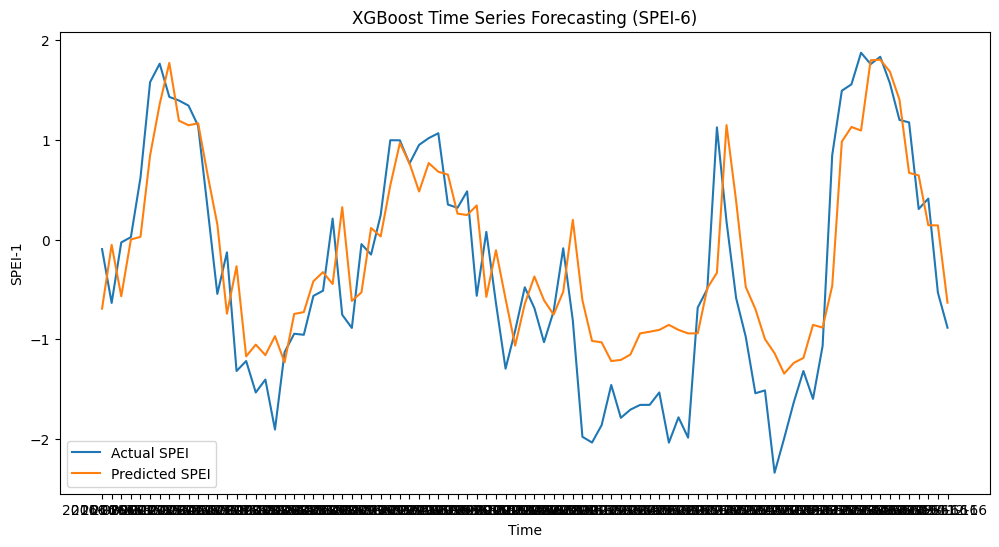

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei6["time"], y_test_spei6, label="Actual SPEI")
plt.plot(test_spei6["time"], y_pred_spei6, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-6)")
plt.show()

In [ ]:
mae, mse, rmse, r2_spei1 = calculate_metrics(y_test_spei6, y_pred_spei6)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei1}")

Mean Absolute Error: 0.4950591312865055
Mean Squared Error: 0.36804004894808173
Root Mean Squared Error: 0.6066630439940129
R^2 Score: 0.727002780395196


### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
}


fine_tuned_xgb_model = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=fine_tuned_xgb_model,
                           param_grid=param_grid,
                           cv=3, # cross validation folds
                           verbose=2,
                           scoring='neg_mean_absolute_error')
grid_search.fit(X_train_spei6, y_train_spei6)

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 252 candidates, totalling 756 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [ ]:
best_xgb_spei6 = grid_search.best_estimator_

# make predictions
y_pred_spei6_after_tuning = best_xgb_spei6.predict(X_test_spei6)

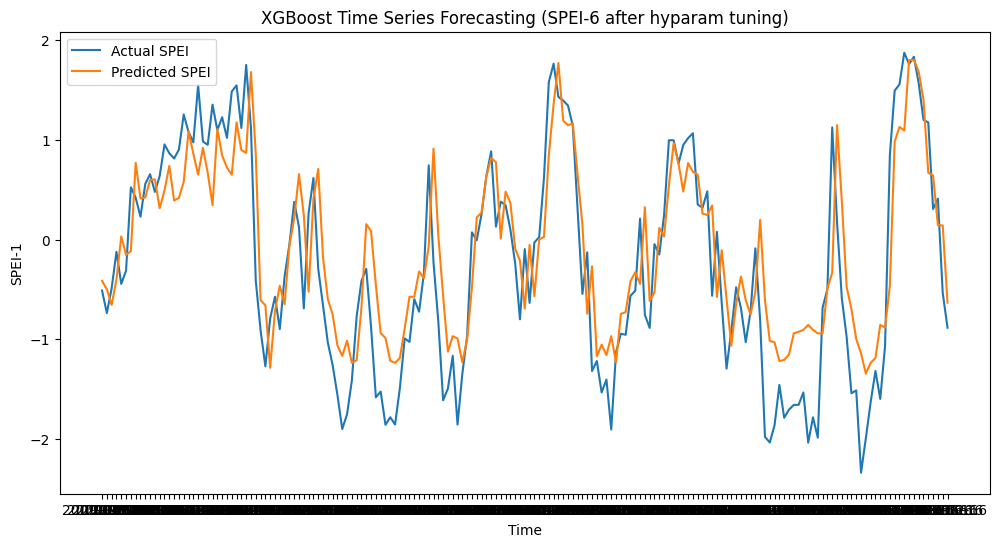

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei6["time"], y_test_spei6, label="Actual SPEI")
plt.plot(test_spei6["time"], y_pred_spei6_after_tuning, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-6 after hyparam tuning)")
plt.show()

In [ ]:
mae, mse, rmse, r2_spei1 = calculate_metrics(y_test_spei6, y_pred_spei6_after_tuning)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2_spei1}")

Mean Absolute Error: 0.4623910409888112
Mean Squared Error: 0.32586948910800995
Root Mean Squared Error: 0.5708497955749918
R^2 Score: 0.7203760813601642


## XGBoost | SPEI-12

### Hyperparameter Tuning

In [ ]:
# grid search
param_grid = {
    'n_estimators': [300, 400, 500, 600, 700, 800, 900, 1000, 2000],
    'max_depth': [3, 5, 7, 10, 15, 20, 22],
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5]
}
tscv = TimeSeriesSplit(n_splits=3)


fine_tuned_xgb_model_spei12 = xgb.XGBRegressor(random_state=42)
grid_search_spei12 = GridSearchCV(estimator=fine_tuned_xgb_model_spei12,
                           param_grid=param_grid,
                           cv=tscv, # cross validation folds
                           verbose=2,
                           scoring='neg_mean_absolute_error')
grid_search_spei12.fit(X_train_spei12, y_train_spei12)

print("Best Parameters:", grid_search_spei12.best_params_)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=600; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_

In [ ]:
best_xgb_spei12 = grid_search_spei12.best_estimator_

# make predictions
y_pred_spei12_after_tuning = best_xgb_spei12.predict(X_test_spei12)

### Model Training

In [ ]:
# model
# xgb_model_spei12 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,
#                              max_depth=5,
#                              learning_rate=0.1,
#                              random_state=42)

# finetuned model 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
xgb_model_spei12 = xgb.XGBRegressor(objective="reg:squarederror",
                             n_estimators=300,
                             max_depth=3,
                             learning_rate=0.01,
                             random_state=42)

# xgb_model_spei12 = xgb.XGBRegressor(objective="reg:squarederror",
#                              n_estimators=500,  # Reduce number of trees
#                              max_depth=5,  # Reduce tree depth
#                              learning_rate=0.05,  # Lower learning rate
#                              subsample=0.8,  # Use 80% of data per tree
#                              colsample_bytree=0.8,  # Use 80% of features per tree
#                              random_state=42)


# train
xgb_model_spei12.fit(X_train_spei12, y_train_spei12)

# make predictions
y_pred_spei12 = xgb_model_spei12.predict(X_test_spei12)

### Evaluation

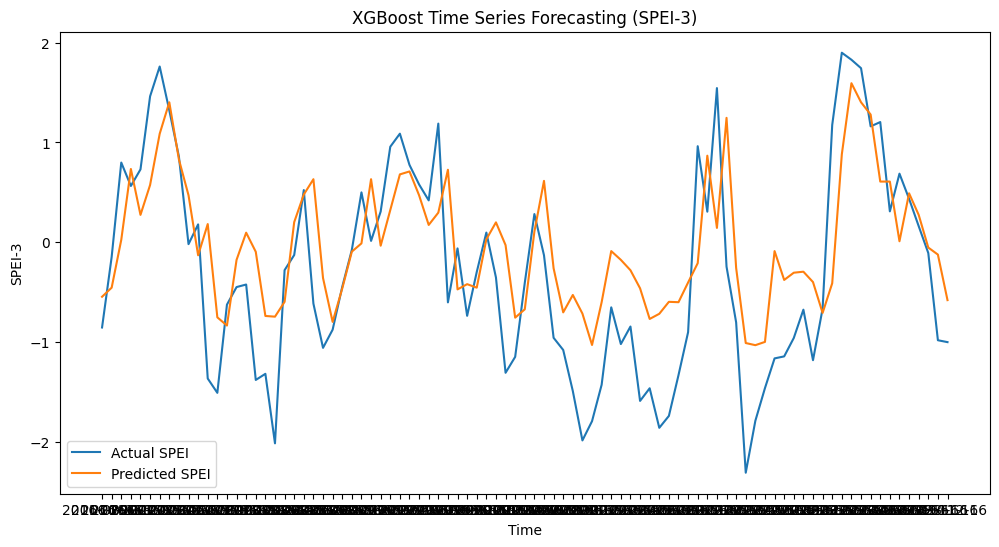

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test_spei12["time"], y_test_spei12, label="Actual SPEI")
plt.plot(test_spei12["time"], y_pred_spei12, label="Predicted SPEI")
plt.xlabel("Time")
plt.ylabel("SPEI-12")
plt.legend()
plt.title("XGBoost Time Series Forecasting (SPEI-12)")
plt.show()

In [ ]:
mae_spei12, mse_spei12, rmse_spei12, r2_spei12 = calculate_metrics(y_test_spei12, y_pred_spei12)
print(f"Mean Absolute Error: {mae_spei12}")
print(f"Mean Squared Error: {mse_spei12}")
print(f"Root Mean Squared Error: {rmse_spei12}")
print(f"R^2 Score: {r2_spei12}")

Mean Absolute Error: 0.5971896245785665
Mean Squared Error: 0.5269864291251339
Root Mean Squared Error: 0.7259383094486294
R^2 Score: 0.5038070107459791
